## <font color='orange'>Grid Search and Ensemble Methods Using the Sonar Dataset</font>

###### by A. Baysa





This notebook is an example of using grid search and ensemble methods on the sonar dataset. For boosting, `AdaBoost` and `Gradient Boosting`were used while for bagging, `Random Forest` and `Extra Trees` were used. At the end of the analysis, the `Support Vector Classifier` was the final model used with its default parameters. 

## Import Libraries

In [90]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, KFold, cross_val_score, GridSearchCV

from sklearn.preprocessing import StandardScaler

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

from sklearn.pipeline import Pipeline

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, RandomForestClassifier, ExtraTreesClassifier

import os
import warnings
warnings.filterwarnings('ignore')
pd.set_option('precision', 2)

## Background of Dataset

The sonar dataset is composed of 61 attributes and 208 rows. Gorman and Sejnowski used this data set in their study of employing a neural network to classify sonar waves. The goal is to train a network to recognize the difference between sonar signals rebounded off a metal cylinder and those bounced off a similarly cylindrical rock. Sejnowski, from Salk Institute and the University of California, San Diego, submitted the data set to the benchmark collection. 

The transmitted sonar signal is a rising frequency frequency-modulated chirp. The data set includes signals gathered from a variety of sources. The cylinder has a 90-degree aspect angle, while the rock has a 180-degree aspect angle. Each pattern consists of a collection of 60 numbers ranging from 0.0 to 1.0. Each value reflects the energy inside a specific frequency range over a specific time period. Because higher frequencies are broadcast later in the chirp, the integration aperture for these frequencies occurs later in time. Metals are denoted by 0 under the Class column while rocks are denoted by 1.
Further details of the dataset can be found [here](https://datahub.io/machine-learning/sonar#python).

The head of the data and the distribution of class types (rock or metal) is presented below.

In [91]:
df = pd.read_csv('c:\\users\\adria\\Downloads\\sonar.csv', header=0)
df.head(3)

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V52,V53,V54,V55,V56,V57,V58,V59,V60,Class
0,0.02,0.04,0.04,0.02,0.10,0.10,0.15,0.16,0.31,0.21,...,2.70e-03,6.50e-03,1.59e-02,7.20e-03,0.02,0.02,8.40e-03,9.00e-03,3.20e-03,1
1,0.05,0.05,0.08,0.07,0.12,0.26,0.22,0.35,0.33,0.29,...,8.40e-03,8.90e-03,4.80e-03,9.40e-03,0.02,0.01,4.90e-03,5.20e-03,4.40e-03,1
2,0.03,0.06,0.11,0.11,0.10,0.23,0.24,0.38,0.56,0.62,...,2.32e-02,1.66e-02,9.50e-03,1.80e-02,0.02,0.03,1.64e-02,9.50e-03,7.80e-03,1


[Text(0.5, 1.0, 'Distribution of Classes')]

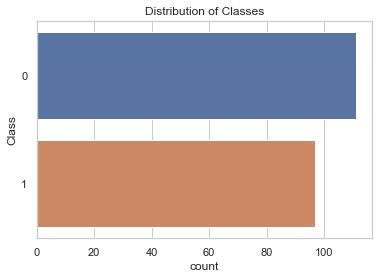

In [92]:
sns.countplot(y="Class", data=df).set(title='Distribution of Classes')

## Visualizing the Data

The plot matrix of the attributes shows the distribution of attributes. We can see that most attributes are mostly skewed with a handful of attributes that
appear to be normally distributed.

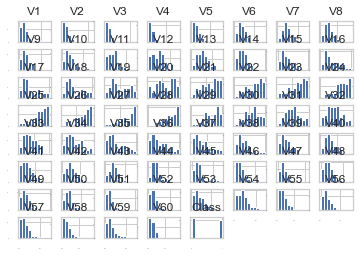

In [93]:
df.hist(sharex=False, sharey=False, xlabelsize=1,ylabelsize=1,); plt.show()

## Creating the train/test Split

Below, the train and test data is created where the training data is assigned 20% of the dataset. The target column (Class) is also initialized.

In [94]:
x = df.iloc[:,0:60]
y = df.iloc[:,-1]
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.2, random_state=7)

## Evaluate Models on Unscaled Data

We will then evaluate the following models on the data. 

`Logistic Regression` is a classification algorithm and is used mainly to predict the probability of occurence of an event by using a logit function. Values for this algorithm ranges from 0 to 1. 

`Decision Trees` are also used for classification and works well with categorical and continuous depenedent variables. The algorithm splits the data into
two or more homogenous categories where the decision to split is based on the most significant attribute that would split the data into the most distinct groups.

`k-Nearest Neighbor` or kNN may be used for both classification and regression problems. Using distance functions (Euclidean, etc.), kNN is an algorithm that stores all available cases and classifies new cases my a majority vote of its k neighbors. Unline Logistic Regression and Linear Discriminant Analysis, kNN is a completely non-parmetric approach and no assumptions are made about the shape of the decision boundaries. 

`Linear Discriminant Analysis` or LDA calculates the separability between classes and estimates the probability that a new set of inputs belongs to a particular class. Similar to Logistic Regression, LDA assumes normality and may perform better if this assumption is met. 

`Naive Bayes` is a classification algorithm based on Bayes Theorem and is preferred for its higher accuracy and speed when we have large data samples. The Gaussian Naive Bayes supports continuous values and assumes that each class is normally distributed.

`Support Vector Machines` or SVM is used for both regression and classification tasks. Similar to LDA, it defines the optimal hyper-planes or boundaries that can be set in order to segregate the data and group them accordingly. Unlike LDA, SVM is optimized over a subset of the data and is not prone to outliers unlike LDA.

Lastly, cross validation using a ten Kfold is used. The results for mean accuracy and standard deviation are presented below where the Decision Tree Classifier yielded the highest accuracy at 73%. As we discussed earlier, we saw that attributes are mostly skewed and does not follow a normal distribution. Keep in mind that the data used for the cross valiation below  is still unscaled.

In [125]:
models = []
models.append(('LR', LogisticRegression(max_iter=1000)))
models.append(('DT', DecisionTreeClassifier()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('NB', GaussianNB()))
models.append(('SVC', SVC()))

In [126]:
my_names = []
my_results = []

for name, model in models:
    kfold = KFold(n_splits=10, random_state=None)
    cv = cross_val_score(model, x_train, y_train, cv=kfold, scoring='accuracy')
    my_names.append(name)
    my_results.append(cv)
    msg = ('%s %f (%f)' % (name, cv.mean(), cv.std()))
    print(msg)    

LR 0.710000 (0.286182)
DT 0.730000 (0.176352)
KNN 0.615000 (0.209821)
LDA 0.635000 (0.226991)
NB 0.620000 (0.263818)
SVC 0.615000 (0.237750)


## Visualize Comparison of Algorithm on Unscaled Data

As mentioned, the Decision Tree Classifier yielded a mean accuracy of 73% with a low standard deviation of 17.63%. This is followed by Logistic Regression with a mean accuracy of 71%, but with a significantly higher standard deviation of 28.61%.

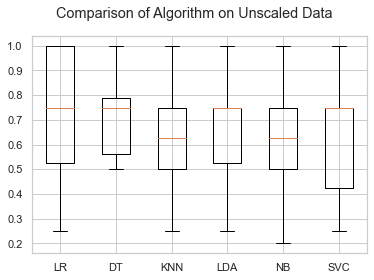

In [128]:
fig = plt.figure()
fig.suptitle('Comparison of Algorithm on Unscaled Data')
ax = fig.add_subplot(111)
plt.boxplot(my_results)
ax.set_xticklabels(my_names)
plt.show()

## Evaluate Algorithms on Scaled Data

We will now build a pipeline for each algorithm using scaled data and do a cross validation on the said pipeline. The `StandardScaler` is used where the mean is removed from each datapoint and standardized by dividing the result with the standard deviation.

In [129]:
pipeline = []
pipeline.append(('ScalerLR', Pipeline([('Scaler', StandardScaler()),('LR',LogisticRegression(max_iter=1000))])))
pipeline.append(('ScalerDT', Pipeline([('Scaler', StandardScaler()),('DT', DecisionTreeClassifier())])))
pipeline.append(('ScaledKNN', Pipeline([('Scaler', StandardScaler()),('KNN', KNeighborsClassifier())])))
pipeline.append(('ScaledNB', Pipeline([('Scaler', StandardScaler()),('NB', GaussianNB())])))
pipeline.append(('ScaledSVC', Pipeline([('Scaler', StandardScaler()),('SVC', SVC())])))

We will rerun our cross validation on standardized data. The results below show that Decision Tree Classifier still performed better with an average accuracy of 80.50% and a standard deviation of 18.63%. 

In [130]:
my_cv = []
my_names = []

for name, model in pipeline:
    kfold = KFold(n_splits=10, random_state=None)
    cv = cross_val_score(model, x_train, y_train, cv=kfold, scoring='accuracy')
    my_names.append(name)
    my_cv.append(cv)
    msg = ('%s %f (%f)' % (name, cv.mean(), cv.std()))
    print(msg)

ScalerLR 0.655000 (0.231787)
ScalerDT 0.805000 (0.186346)
ScaledKNN 0.570000 (0.203961)
ScaledNB 0.620000 (0.263818)
ScaledSVC 0.635000 (0.276632)


## Visualize Comparison of Algorithm on Scaled Data

The boxplots below show that the Decision Tree Classifier still performed better compared to the other algorithms. Note, however, that the standard deviation increased to 18.63% versus the previous 15.88%.

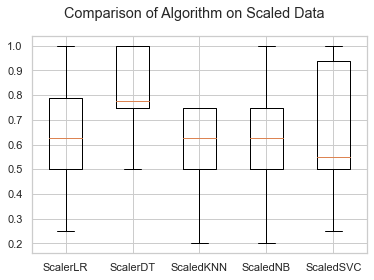

In [131]:
fig = plt.figure()
fig.suptitle('Comparison of Algorithm on Scaled Data')
ax = fig.add_subplot(111)
plt.boxplot(my_cv)
ax.set_xticklabels(my_names)
plt.show()

## Hyperparameter Tuning of SVC

Below, we will perform a hyperparameteroptimization by doing a grid search of values to discover the optimal set of model configuration that result in 
the best performance of the model. The optimization resulted to a best score of 73% using `C=0.3` and `linear` kernal value. As we know, C values dictates how our model will perform given noisy points in the data while the kernel maps the datapoints into a feature space.

In [108]:
scaler = StandardScaler().fit(x_train)
rescaled_x = scaler.transform(x_train)
c_vals = [0.1, 0.3, 0.5, 0.7, 0.9, 1.0, 1.3, 1.5, 1.7, 2.0]
kernel_vals = ['poly', 'rbf', 'linear', 'sigmoid']
param_grid = dict(C=c_vals, kernel=kernel_vals)

model = SVC()
kfold = KFold(n_splits = 10, random_state=None)
grid = GridSearchCV(estimator = model, param_grid=param_grid, scoring = 'accuracy', cv=kfold)
grid_result = grid.fit(rescaled_x, y_train)
    
print('Best score %f using %s' % (grid_result.best_score_, grid_result.best_params_))

means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']

for mean, stdev, param in zip(means, stds, params):
    print('%f (%f) with %r' % (mean, stdev, param))

Best score 0.730000 using {'C': 0.3, 'kernel': 'linear'}
0.535000 (0.236696) with {'C': 0.1, 'kernel': 'poly'}
0.435000 (0.230272) with {'C': 0.1, 'kernel': 'rbf'}
0.655000 (0.257342) with {'C': 0.1, 'kernel': 'linear'}
0.435000 (0.230272) with {'C': 0.1, 'kernel': 'sigmoid'}
0.560000 (0.269072) with {'C': 0.3, 'kernel': 'poly'}
0.460000 (0.192094) with {'C': 0.3, 'kernel': 'rbf'}
0.730000 (0.236854) with {'C': 0.3, 'kernel': 'linear'}
0.495000 (0.255392) with {'C': 0.3, 'kernel': 'sigmoid'}
0.585000 (0.193714) with {'C': 0.5, 'kernel': 'poly'}
0.440000 (0.217715) with {'C': 0.5, 'kernel': 'rbf'}
0.730000 (0.236854) with {'C': 0.5, 'kernel': 'linear'}
0.585000 (0.193714) with {'C': 0.5, 'kernel': 'sigmoid'}
0.560000 (0.186815) with {'C': 0.7, 'kernel': 'poly'}
0.565000 (0.279330) with {'C': 0.7, 'kernel': 'rbf'}
0.730000 (0.236854) with {'C': 0.7, 'kernel': 'linear'}
0.585000 (0.223663) with {'C': 0.7, 'kernel': 'sigmoid'}
0.560000 (0.186815) with {'C': 0.9, 'kernel': 'poly'}
0.635000 

## Ensemble Methods

Next, we will check ensemble methods using the algorithms below. Ensemble methods work by combining two or more models to make a prediction.

`AdaBoost` is a technique that combines weak learners together to form a strong learner. A weak learner is a decision stump made up of a single split. Each classifider is assigned a different weight based on the classifier's performance (where more weight is assigned to the classifier with a higher accuracy). At each round, weights are assigned to the observations in order for misclassified observations to have a bigger chance to being selected in the next sampling. Unlike Random Forest where all trees are assigned equal weights, AdaBoost assigns weights to both the datapoint and scores to every classifier. 

`Gradient Boost` or GBM also combines weak learners in order to form a strong learner, but it is an additive model as the residual of the current classifier is carried over to the next classifier. As the name implies, the model uses Gradient Descent and identifies the negative gradient in order to find the optimal values. 

`Random Forest` is used for both classification and regression. It takes a majority vote for classification and mean for regression. Random Forest can handle continuous variables as in the case of regresion and categorical variables in the case of classification. Unlike AdaBoost which uses `boosting` (combining weak learners into a strong learner), Random Forest uses `bagging` or `bootstrap aggregation` as it creates a different training subset from the train data (with replacement) and the output is based on marjority voting. 

`Extra Trees` is an algorithm that combines the predictions from many decision tress. It is similar to the Random Forest model, but uses a simpler  algorith and utlizes a few key hyperparameters.

Doing cros validation using the similar ten KFold split above, GBM yielded the highest average accuracy at 80.50% with a standard deviation of 18.63%. 

In [132]:
ensembles = []
ensembles.append(('AdaBoost', AdaBoostClassifier()))
ensembles.append(('GradientBoost', GradientBoostingClassifier()))
ensembles.append(('RandomForest', RandomForestClassifier()))
ensembles.append(('ExtraTrees', ExtraTreesClassifier()))

In [133]:
my_cv = []
my_names = []

for name, model in ensembles:
    kfold = KFold(n_splits=10, random_state=None)
    cv = cross_val_score(model, x_train, y_train, cv=kfold, scoring='accuracy')
    my_cv.append(cv)
    my_names.append(name)
    msg = '%s %f (%f)' % (name, cv.mean(), cv.std())
    print(msg)

AdaBoost 0.735000 (0.198809)
GradientBoost 0.805000 (0.186346)
RandomForest 0.690000 (0.199750)
ExtraTrees 0.710000 (0.238537)


### Visualize Comparison of Ensembles on Unscaled Data

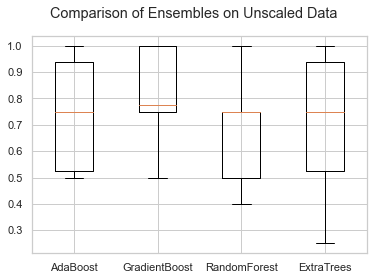

In [134]:
fig = plt.figure()
fig.suptitle('Comparison of Ensembles on Unscaled Data')
ax = fig.add_subplot(111)
plt.boxplot(my_cv)
ax.set_xticklabels(my_names)
plt.show()

## Evaluate Ensembles on Scaled Data

We will create another pipeline for the standardized data and do a cross validation using the ensemble algorithms. 

Based on the results, GBM still performed better with an average accuracy of 80.50% and a standard deviation of 18.63%. 

In [137]:
pipeline2 = []
pipeline2.append(('ScalerAB', Pipeline([('Scaler', StandardScaler()),('AB',AdaBoostClassifier())])))
pipeline2.append(('ScalerGBM', Pipeline([('Scaler', StandardScaler()),('GBM', GradientBoostingClassifier())])))
pipeline2.append(('ScaledRF', Pipeline([('Scaler', StandardScaler()),('RF', RandomForestClassifier())])))
pipeline2.append(('ScaledET', Pipeline([('Scaler', StandardScaler()),('ET', ExtraTreesClassifier())])))

In [138]:
my_cv = []
my_names = []

for name, model in pipeline2:
    kfold = KFold(n_splits=10, random_state=None)
    cv = cross_val_score(model, x_train, y_train, cv=kfold, scoring='accuracy')
    my_names.append(name)
    my_cv.append(cv)
    msg = ('%s %f (%f)' % (name, cv.mean(), cv.std()))
    print(msg)

ScalerAB 0.710000 (0.210713)
ScalerGBM 0.805000 (0.186346)
ScaledRF 0.735000 (0.198809)
ScaledET 0.715000 (0.247032)


### Visualize Comparison of Ensembles on Scaled Data

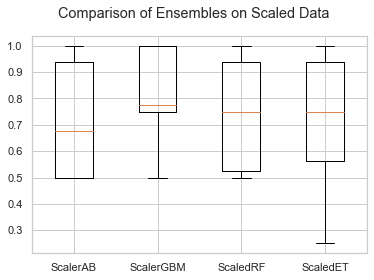

In [139]:
fig = plt.figure()
fig.suptitle('Comparison of Ensembles on Scaled Data')
ax = fig.add_subplot(111)
plt.boxplot(my_cv)
ax.set_xticklabels(my_names)
plt.show()

## Finalize the Model

We will not compare the performance of SVC and GBM on the test data.

In [151]:
scaler = StandardScaler().fit(x_train)
rescaled_x = scaler.transform(x_train)
model = SVC()
model.fit(rescaled_x, y_train)

SVC()

In [152]:
rescaled_x_test = scaler.transform(x_test)
predictions = model.predict(rescaled_x_test)
print(accuracy_score(y_test, predictions))
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

0.7305389221556886
[[62 30]
 [15 60]]
              precision    recall  f1-score   support

           0       0.81      0.67      0.73        92
           1       0.67      0.80      0.73        75

    accuracy                           0.73       167
   macro avg       0.74      0.74      0.73       167
weighted avg       0.74      0.73      0.73       167



SVC yielded an accuracy of 73.05%. Below is the result for GBM.

In [153]:
scaler = StandardScaler().fit(x_train)
rescaled_x = scaler.transform(x_train)
model = GradientBoostingClassifier()
model.fit(rescaled_x, y_train)

GradientBoostingClassifier()

In [154]:
rescaled_x_test = scaler.transform(x_test)
predictions = model.predict(rescaled_x_test)
print(accuracy_score(y_test, predictions))
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

0.6287425149700598
[[48 44]
 [18 57]]
              precision    recall  f1-score   support

           0       0.73      0.52      0.61        92
           1       0.56      0.76      0.65        75

    accuracy                           0.63       167
   macro avg       0.65      0.64      0.63       167
weighted avg       0.65      0.63      0.63       167



GBM's accuracy performed lowered compared to SVC at 62.87%. As our dataset is imbalanced, we will look at the other metrics.

As we know, the Precision (True Positive/(True Positive+False Positive)) metric measures the correctly predicted cases that turned out to be positive while Recall (True Positive/(True Positive+False Negative) or True Positive Rate/Sensitivity) measures how many of the actual positive cases we were able to predict correctly. For both models, Recall is high for 1 at 80% for SVM and 76% for GBM.

The F1-Score for SVM is also higher at 73%. The metric measures the harmonic mean between Precision and Recall and measures the combination of both metrics
(2 x Recall x precision)/(Recall + Precision).